In [1]:
import numpy as np
import pandas as pd 

In [2]:
df = pd.read_csv('../data/mall_customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df['Gender'].replace({'Male' : 1 , 'Female' : 0},inplace = True)
df.drop(columns = ['CustomerID'])

C:\Users\Ali\AppData\Local\Temp\ipykernel_10524\1870581912.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'Male' : 1 , 'Female' : 0},inplace = True)
C:\Users\Ali\AppData\Local\Temp\ipykernel_10524\1870581912.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [4]:
import numpy as np
import pandas as pd 

class Preprocessor : 
    def __init__ (self, df):
        self.df = df.copy()

    def replacement(self):
        self.df['Gender'].replace({'Male' : 1 , 'Female' : 0},inplace = True)

    def delete(self):
        self.df.drop(columns = ['CustomerID'])
        
    def transform (self) : 
        self.replacement()
        self.delete()
        return self.df

In [5]:
%%writefile preprocessor.py

import numpy as np
import pandas as pd 

class Preprocessor : 
    def __init__ (self, df):
        self.df = df.copy()

    def replacement(self):
        self.df['Gender'].replace({'Male' : 1 , 'Female' : 0},inplace = True)

    def delete(self):
        self.df.drop(columns = ['CustomerID'])
        
    def transform (self) : 
        self.replacement()
        self.delete()
        return self.df

Overwriting preprocessor.py


In [6]:
# modeling

from sklearn.cluster import KMeans
model = KMeans(n_clusters = 5)
model.fit(df)

c:\Users\Ali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
# predict test samples
submission = pd.DataFrame(model.predict(df))
submission.columns = ['segment']
submission.to_csv('submission.csv', index=False)
submission

,segment
0,3
1,3
2,2
3,3
4,2
...,...
195,1
196,4
197,1
198,4


<AxesSubplot: ylabel='Frequency'>

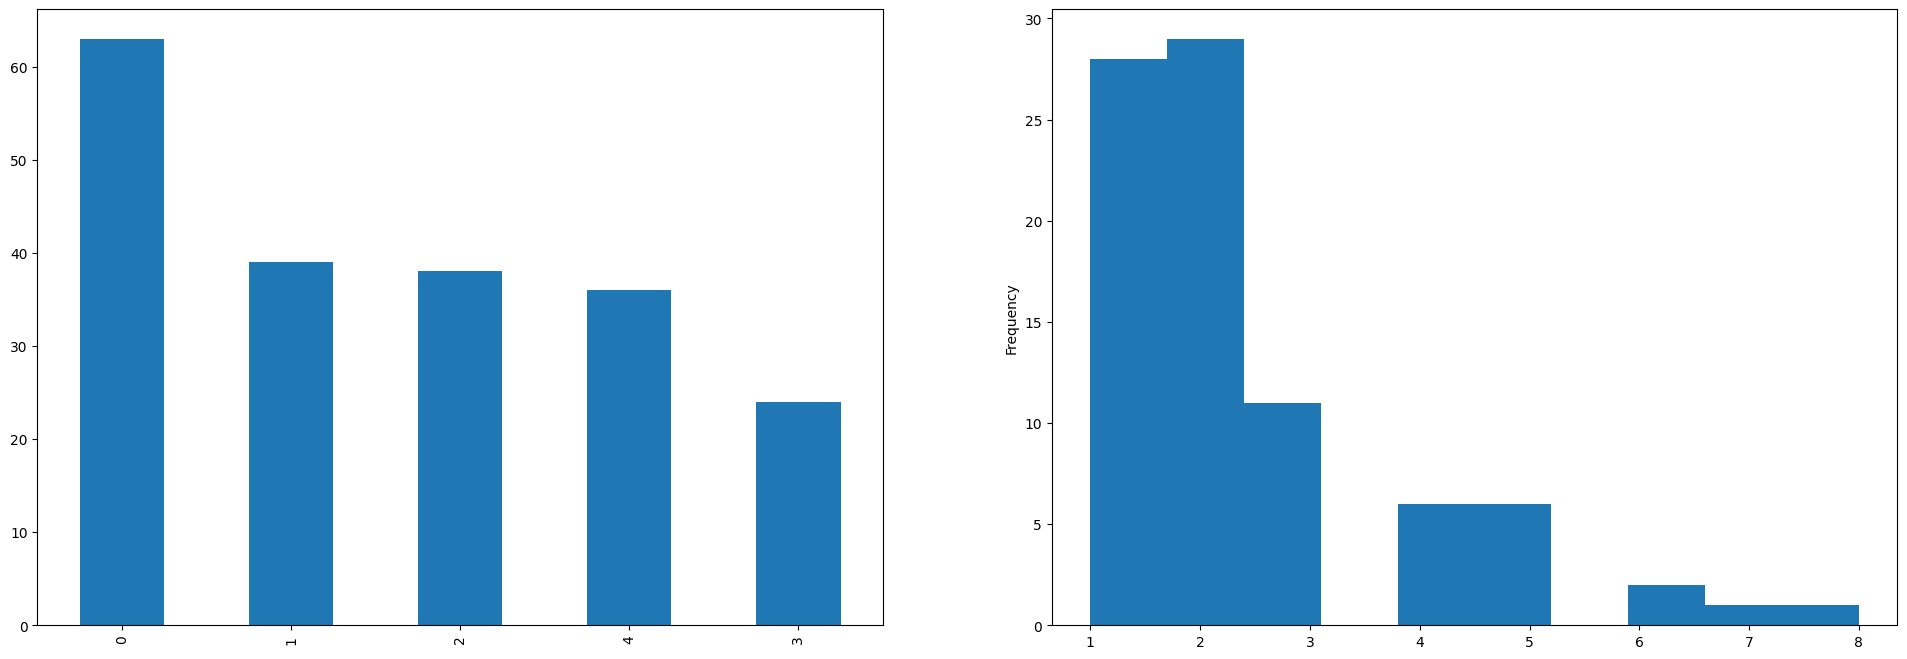

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))

submission['segment'].value_counts().plot(kind = 'bar' , ax = ax1)
df['Spending Score (1-100)'].value_counts().plot( kind = 'hist', ax = ax2)

In [ ]:
from preprocessor import *
from sklearn.metrics import silhouette_score
import pandas as pd 

sil_score = silhouette_score(Preprocessor(pd.read_csv('../data/mall_customers.csv')).transform(),pd.read_csv('submission.csv').segment)
print( 100 * (sil_score + 1 ) / 2 )

71.01876267371632
